In [5]:
%matplotlib inline
import sys, os, glob

from astropy.io import fits, ascii

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import astropy.constants as const
from astropy.coordinates import SkyCoord, concatenate
from astropy import table
from astropy.time import Time

In [6]:
import scienceplots

plt.style.use([ 'bright', 'science', 'no-latex', 'notebook'])

## Observavility

In [7]:
import astroplan
from astroplan import FixedTarget, Observer
from astroplan.plots import plot_airmass, plot_altitude

# https://arxiv.org/pdf/2012.12824.pdf
C3 = FixedTarget(name='SN-C3', coord=SkyCoord(52.6484, -28.1000, unit='deg'))
X3 = FixedTarget(name='SN-X3', coord=SkyCoord(36.4500, -4.6000, unit='deg'))
E2 = FixedTarget(name='SN-E2', coord=SkyCoord(9.5000,  -43.9980, unit='deg')) ## Too low

COSMOS = FixedTarget(name='COSMOS', coord=SkyCoord(150.11916667, 2.20583333, unit='deg'))

targets = [C3, X3, E2, COSMOS]

In [8]:
for t in targets:
    print(t.name)
    print(t.coord.ra.hourangle, t.coord.dec.deg)
    # 
    print(t.coord.ra.to_string(unit=u.hour),
          t.coord.dec.to_string(u.degree, alwayssign=True))
    print('.....')

SN-C3
3.509893333333334 -28.1
3h30m35.616s -28d06m00s
.....
SN-X3
2.4300000000000006 -4.6
2h25m48s -4d36m00s
.....
SN-E2
0.6333333333333334 -43.998
0h38m00s -43d59m52.8s
.....
COSMOS
10.007944444666668 2.20583333
10h00m28.6000008s +2d12m20.999988s
.....


In [9]:
observer = Observer.at_site('palomar')

In [10]:
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
constraints = [AltitudeConstraint(20*u.deg), astroplan.MoonSeparationConstraint(0.5*u.deg),
               AirmassConstraint(5), AtNightConstraint.twilight_civil()]

astroplan.months_observable(constraints, observer, targets)

[{1, 2, 3, 7, 8, 9, 10, 11, 12},
 {1, 2, 3, 6, 7, 8, 9, 10, 11, 12},
 set(),
 {1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12}]

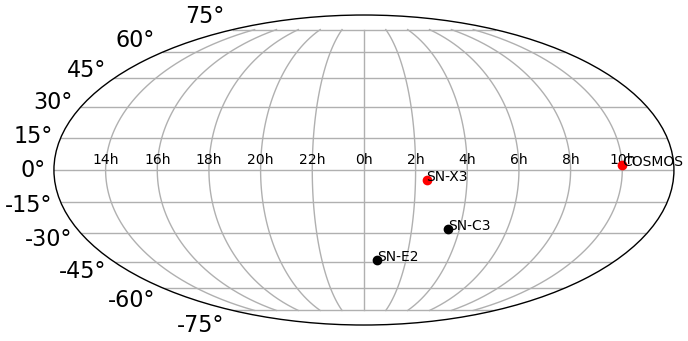

In [11]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
for t in targets:
    if t.name == 'COSMOS' or t.name == 'SN-X3':
        color='r'
    else:
        color='k'
    ax.text(t.coord.ra.radian, t.coord.dec.radian, t.name, zorder=11)
    ax.scatter(t.coord.ra.radian, t.coord.dec.radian, color=color, zorder=10)

ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'], fontsize=10)
ax.grid(True)

fig.savefig('sky.eps', format='eps')

/Users/colinburke/miniconda3/lib/python3.11/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


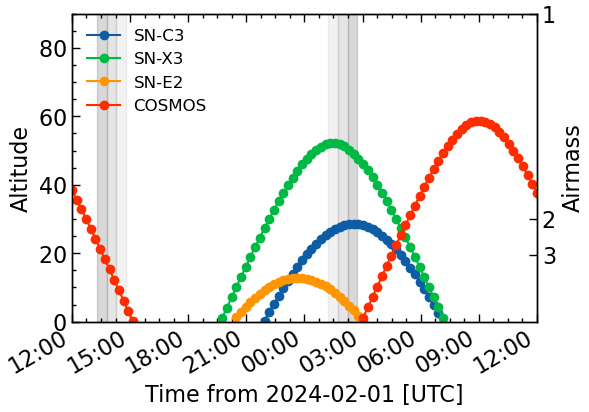

In [12]:
dt = 1*u.day
observe_time = Time("2024-02-02")

fig, ax = plt.subplots(1,1, figsize=(6, 4))

for t in [targets]:
    plot_altitude(t, observer, observe_time, brightness_shading=True, airmass_yaxis=True, ax=ax)

ax.legend(shadow=True, loc=2, fontsize=12)

### Follow-up to get spec-z to enable SED fitting:

In [22]:
# Read HSC-SSP AGNs
data_agn_cosmos = ascii.read('hsc_agn_updated.txt')
cat_agn_cosmos = SkyCoord(data_agn_cosmos['RAdeg'], data_agn_cosmos['DEdeg'], unit='deg')

In [105]:
mask_ph = data_agn_cosmos['z']==data_agn_cosmos['z_phot']
#mask_br = r < 22
mask_br =  data_agn_cosmos['i-mag'] < 22

data_agn_cosmos_targets = data_agn_cosmos[mask_ph & mask_br]
data_agn_cosmos_targets = table.Table([data_agn_cosmos_targets['ID'], data_agn_cosmos_targets['RAdeg'], data_agn_cosmos_targets['DEdeg'], data_agn_cosmos_targets['i-mag']],
                                      names=['ID', 'RA', 'dec', 'mag'])
data_agn_cosmos_targets

ID,RA,dec,mag
int64,float64,float64,float64
23,150.53187,2.18892,21.58
217,150.05858,2.73034,21.69
221,149.8347,1.81766,21.92
455,150.14082,2.73189,21.19
459,149.63865,2.289,20.25


NameError: name 'r' is not defined

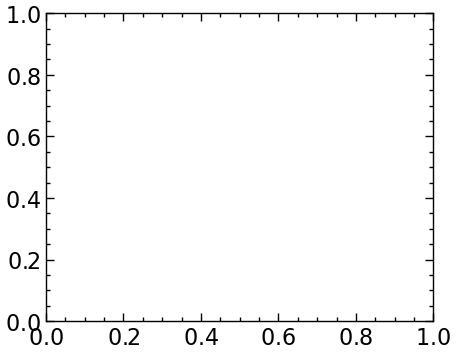

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(5, 4))

ax.hist(r)
ax.hist(r[mask_ph], label='no spec-z')

ax.axvline(21, c='k')

ax.set_xlabel(r'$r$')
ax.set_ylabel('Count')

fig.tight_layout()

In [ ]:
# TODO: Also read Chandra COSMOS legacy and re-do Mar's analysis

In [14]:
# Burke sources

data_agn_des = ascii.read('../dwarf_agn_cosmos/des/des_agn_updated.txt')
data_agn_des

Name,RA,dec,$g$,SNR,$\sigma_{\rm{LB}}$,$\log\ \frac{M_{\ast}}{M_{\odot}}$,$\Delta\chi_\nu^2$,"$\log\ \frac{\tau_{\rm{\textsc{DRW},rest}}}{\rm{days}}$",$z_{\rm{ph}}$,$z_{\rm{sp}}$,$z_{\rm{sp}}$ source,$W1{-}W2$,$\log \frac{F_{2-7 {\rm{\ keV}}}}{{\rm{erg\ s}}^{-1} {\rm{\ cm}}^{-2}}$,Field
str20,float64,float64,float64,float64,float64,str14,float64,str16,str22,float64,str4,float64,float64,str5
J032833.79-271056.42,52.1408,-27.1823,23.7,14.2,13.3,$10.1 \pm 0.4$,0.1,$3.2 \pm 0.6$,$1.02^{+0.03}_{-0.04}$,nan,None,0.4,nan,SN-C3
J032951.20-271057.43,52.4633,-27.1826,23.4,15.3,12.7,$7.8 \pm 0.7$,0.1,$1.9 \pm 0.3$,$0.24^{+0.04}_{-0.02}$,nan,None,18.6,nan,SN-C3
J032944.64-271107.53,52.436,-27.1854,23.4,20.1,16.3,$9.4 \pm 0.5$,0.0,$2.4 \pm 0.8$,$1.09^{+0.02}_{-0.02}$,nan,None,0.9,nan,SN-C3
J032845.45-271117.18,52.1894,-27.1881,21.5,22.8,18.3,$9.7 \pm 0.0$,5.0,$1.7 \pm 0.2$,$1.30^{+0.10}_{-0.15}$,nan,None,1.1,nan,SN-C3
J032843.19-271117.75,52.1799,-27.1883,23.8,13.4,12.4,$8.8 \pm 0.5$,0.0,$2.7 \pm 0.8$,$0.60^{+0.25}_{-0.05}$,nan,None,nan,nan,SN-C3
J032850.22-271208.00,52.2093,-27.2022,19.2,26.1,20.3,$10.2 \pm 0.6$,0.0,$2.7 \pm 0.6$,$0.90^{+0.40}_{-0.30}$,0.803,SIMB,1.1,nan,SN-C3
J032913.11-271213.79,52.3046,-27.2038,22.9,21.6,17.2,$10.4 \pm 0.5$,0.3,$2.2 \pm 0.7$,$1.25^{+0.15}_{-0.10}$,nan,None,1.0,nan,SN-C3
J032847.11-271553.99,52.1963,-27.265,21.1,23.6,19.0,$7.3 \pm 0.1$,3.2,$3.6 \pm 0.4$,$0.08^{+0.03}_{-0.04}$,2.9784,2dF,18.1,nan,SN-C3
J033039.78-271740.97,52.6658,-27.2947,24.1,10.0,11.7,$9.6 \pm 0.5$,0.4,$1.9 \pm 0.4$,$1.45^{+0.02}_{-0.02}$,nan,None,nan,nan,SN-C3


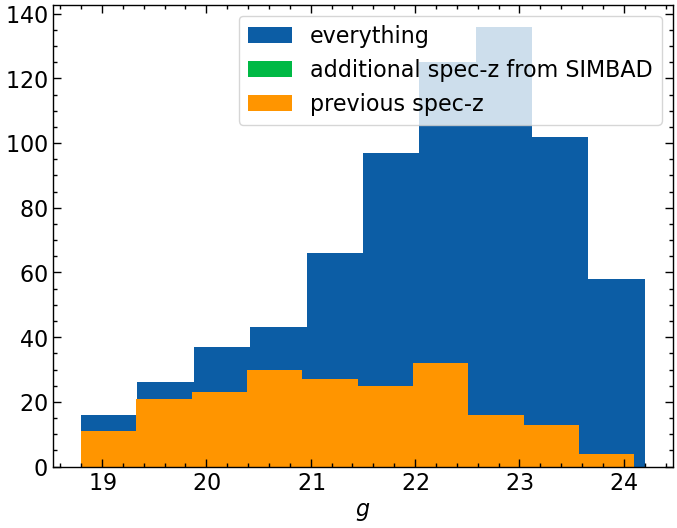

In [15]:
mask_specz_updated = np.isfinite(data_agn_des[r'$z_{\rm{sp}}$'].data)
plt.hist(data_agn_des['$g$'], label='everything')
plt.hist(data_agn_des['$g$'][mask_specz_updated], label='additional spec-z from SIMBAD')
mask_specz = np.isfinite(data_agn_des[r'$z_{\rm{sp}}$'].data)
plt.hist(data_agn_des['$g$'][mask_specz], label='previous spec-z')
plt.xlabel('$g$')
plt.legend(frameon=True, loc=1)

In [104]:
mask_specz = (data_agn_des[r'$z_{\rm{sp}}$ source']=='None') & (data_agn_des['$g$'] < 22) & (data_agn_des['Field'] == 'SN-X3')
data_agn_des_targets = data_agn_des[mask_specz]
data_agn_des_targets['ID'] = np.arange(len(data_agn_des_targets))


data_agn_des_targets = table.Table([data_agn_des_targets['ID'], data_agn_des_targets['RA'], data_agn_des_targets['dec'], data_agn_des_targets[r'$g$']],
                                   names=['ID', 'RA', 'dec', 'mag'])
data_agn_des_targets

ID,RA,dec,mag
int64,float64,float64,float64
0,36.481,-4.6551,21.0
1,36.2578,-4.6903,21.4
2,36.0694,-4.9453,21.1


### Figures

Mi vs. redshift

In [18]:
from astropy.cosmology import FlatLambdaCDM
cosmo = FlatLambdaCDM(H0=70, Om0=0.3, Tcmb0=2.725)

In [20]:
# Read SDSS
hdul = fits.open('../dr16q_prop_May16_2023.fits')

/var/folders/kx/qz91z8390zqfjrd9v6mt61w00000gn/T/ipykernel_1108/2601842634.py:9: RuntimeWarning: divide by zero encountered in log10
  Mi = data_agn_des['$g$'] - 5*np.log10(d.to(u.pc).value/10) - 0.26
/var/folders/kx/qz91z8390zqfjrd9v6mt61w00000gn/T/ipykernel_1108/2601842634.py:39: RuntimeWarning: divide by zero encountered in log10
  Mi = data_agn_cosmos['i-mag'][mask_ph] - 5*np.log10(d.to(u.pc).value/10)
/var/folders/kx/qz91z8390zqfjrd9v6mt61w00000gn/T/ipykernel_1108/2601842634.py:56: RuntimeWarning: divide by zero encountered in log10
  Mi = 22 - 5*np.log10(d.to(u.pc).value/10)


267
5


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


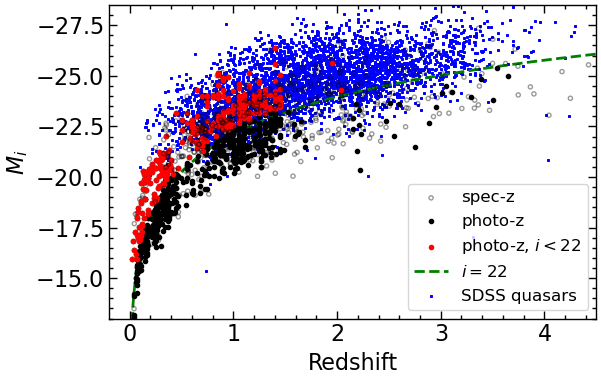

In [21]:
fig, ax = plt.subplots(1,1, figsize=(6, 4))

### DES ###

# Spec-z
z_sp = data_agn_des[r'$z_{\rm{sp}}$'].data

d = cosmo.luminosity_distance(z_sp)
Mi = data_agn_des['$g$'] - 5*np.log10(d.to(u.pc).value/10) - 0.26

ax.scatter(z_sp, Mi, marker='.', edgecolors='k', color='none', alpha=0.4)

# Photo-z
z_ph = np.array([float(s[1:5]) for s in data_agn_des[r'$z_{\rm{ph}}$'].data])
d = cosmo.luminosity_distance(z_ph)
Mi = data_agn_des['$g$'] - 5*np.log10(d.to(u.pc).value/10) - 0.26

ax.scatter(z_ph, Mi, marker='.', color='k', zorder=1)

mask_br = data_agn_des['$g$'] < 22
ax.scatter(z_ph[mask_br], Mi[mask_br], marker='.', color='r', zorder=1)

print(len( Mi[mask_br]))

### HSC-SSP ###

mask_ph = data_agn_cosmos['z']!=data_agn_cosmos['z_phot']
z_sp = data_agn_cosmos['z'][mask_ph]

d = cosmo.luminosity_distance(z_sp)
Mi = data_agn_cosmos['i-mag'][mask_ph] - 5*np.log10(d.to(u.pc).value/10) + 0.26

ax.scatter(z_sp, Mi, label='spec-z', marker='.', edgecolors='k', color='none', alpha=0.4)

mask_ph = data_agn_cosmos['z']==data_agn_cosmos['z_phot']
z_sp = data_agn_cosmos['z'][mask_ph]

d = cosmo.luminosity_distance(z_sp)
Mi = data_agn_cosmos['i-mag'][mask_ph] - 5*np.log10(d.to(u.pc).value/10)

ax.scatter(z_sp, Mi, label='photo-z', marker='.', color='k', zorder=1)

mask_br = data_agn_cosmos['i-mag'][mask_ph] < 22
ax.scatter(z_sp[mask_br], Mi[mask_br], label=r'photo-z, $i < 22$', marker='.', color='r', zorder=1)

print(len( Mi[mask_br]))

### Mezcua ###



### det limit ###

z = np.linspace(0, 4.5, 1000)
d = cosmo.luminosity_distance(z)
Mi = 22 - 5*np.log10(d.to(u.pc).value/10)
ax.plot(z, Mi, label=r'$i=22$', color='g', linestyle='dashed', zorder=-1)

ax.set_xlim(-0.2, 4.5)
ax.set_ylim(-13, -28.5)

ax.scatter(hdul[1].data['Z_DR16Q'][::200], 90 - 2.5*hdul[1].data['LOGLBOL'][::200], marker='+', color='b', s=1, zorder=-10, label='SDSS quasars')


ax.set_xlabel(r'Redshift')
ax.set_ylabel(r'$M_i$')

ax.legend(fontsize=12, frameon=True, loc=4)

fig.tight_layout()
fig.savefig('Mi.eps', format='eps')

### TARGET LIST

standard stars

### OFFSET STARS

First go to legacy and pick a bright star (r=15-19)

obj=[72.34792811186126 ,-5.116148]
ref= [  72.3581, -5.1112]

dra = 3600*(obj[0] - ref[0]) * np.cos(ref[1] * np.pi / 180)
ddec = 3600*(obj[1] - ref[1])
print('E = {:0.2f}\"  N= {:0.2f}\"'.format(dra,ddec))


In [106]:
# Make combined targest: SN-X3 + COSMOS
data_agn_des_targets

ID,RA,dec,mag
int64,float64,float64,float64
0,36.481,-4.6551,21.0
1,36.2578,-4.6903,21.4
2,36.0694,-4.9453,21.1


In [107]:
data_agn_cosmos_targets

ID,RA,dec,mag
int64,float64,float64,float64
23,150.53187,2.18892,21.58
217,150.05858,2.73034,21.69
221,149.8347,1.81766,21.92
455,150.14082,2.73189,21.19
459,149.63865,2.289,20.25


In [125]:
data_agn_combined_targets = table.vstack([data_agn_des_targets, data_agn_cosmos_targets])
data_agn_combined_targets
coords_agn_combined_targets = SkyCoord(data_agn_combined_targets['RA'], data_agn_combined_targets['dec'], unit='deg')

In [121]:
# Standard star: BD+75325
coord_std = SkyCoord.from_name('08:10:49.49 +74:57:57.9')

row = [999, coord_std.ra.deg, coord_std.dec.deg, 20]
print(len(row))
data_agn_combined_targets.add_row(row) # add std star


## OFFSETS
offset_star_des1 = SkyCoord(36.5031, -4.6749, unit='deg') # 
offset_star_des2 = SkyCoord(36.2512, -4.6772, unit='deg') # 
offset_star_des3 = SkyCoord(36.0585, -4.9382, unit='deg') # 


offset_star1 = SkyCoord(150.5219, 2.1847, unit='deg') # 
offset_star2 = SkyCoord(150.0475, 2.7328, unit='deg')
offset_star3 = SkyCoord(149.8535, 1.8180, unit='deg')
offset_star4 = SkyCoord(150.1495, 2.7277, unit='deg')
offset_star5 = SkyCoord(149.6395, 2.3030, unit='deg')

offset_stars = concatenate([offset_star_des1, offset_star_des2, offset_star_des3, offset_star1, offset_star2, offset_star3, offset_star4, offset_star5])
offset_stars


4


<SkyCoord (ICRS): (ra, dec, distance) in (deg, deg, )
    [( 36.5031, -4.6749, 1.), ( 36.2512, -4.6772, 1.),
     ( 36.0585, -4.9382, 1.), (150.5219,  2.1847, 1.),
     (150.0475,  2.7328, 1.), (149.8535,  1.818 , 1.),
     (150.1495,  2.7277, 1.), (149.6395,  2.303 , 1.)]>

In [147]:
from observing_suite import Target, ObservingPlan
from astropy.coordinates import SkyCoord
import astropy.units as u

def make_targetlist(target_list, offset_stars):
    target_list_obs_suite = []

    for i in range(len(target_list)):
        print(i)
        target_coord = SkyCoord(ra=target_list['RA'][i], dec=target_list['dec'][i], unit='deg')
        custom_target = Target(name=str(target_list['ID'].astype(int)[i]), coordinates=target_coord, parse_name=False)
        custom_target.add_configuration(config_name='primary',
                              obstype='spectroscopy',
                              slit_width=1*u.arcsec)
                              #slit_length=60*u.arcsec,
                              #slit_width=1*u.arcsec,
                              #PA=background_fields[i][1]*u.deg)
        

        if target_list['ID'].astype(int)[i] != 999:
            custom_target.add_offset_star(coordinate=offset_stars[i],
                                #coord_units=(u.hourangle,u.deg),
                                configurations='all')

        target_list_obs_suite.append(custom_target)
    
    plan = ObservingPlan(target_list_obs_suite,
                     observatory='Palomar',
                     obsdates='2024-02-02',
                     utcoffset=-8)
    plan.export_targetlist(name="dbsp_targets_cosmos", include_extras=['offsets'])

    ## 
    plan.plot_visibility('2024-02-02');

    return 

0
1
2
3
4
5
6
7
8


        Use get_body("moon") instead. [observing_suite.observing_plan]
/Users/colinburke/miniconda3/lib/python3.11/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


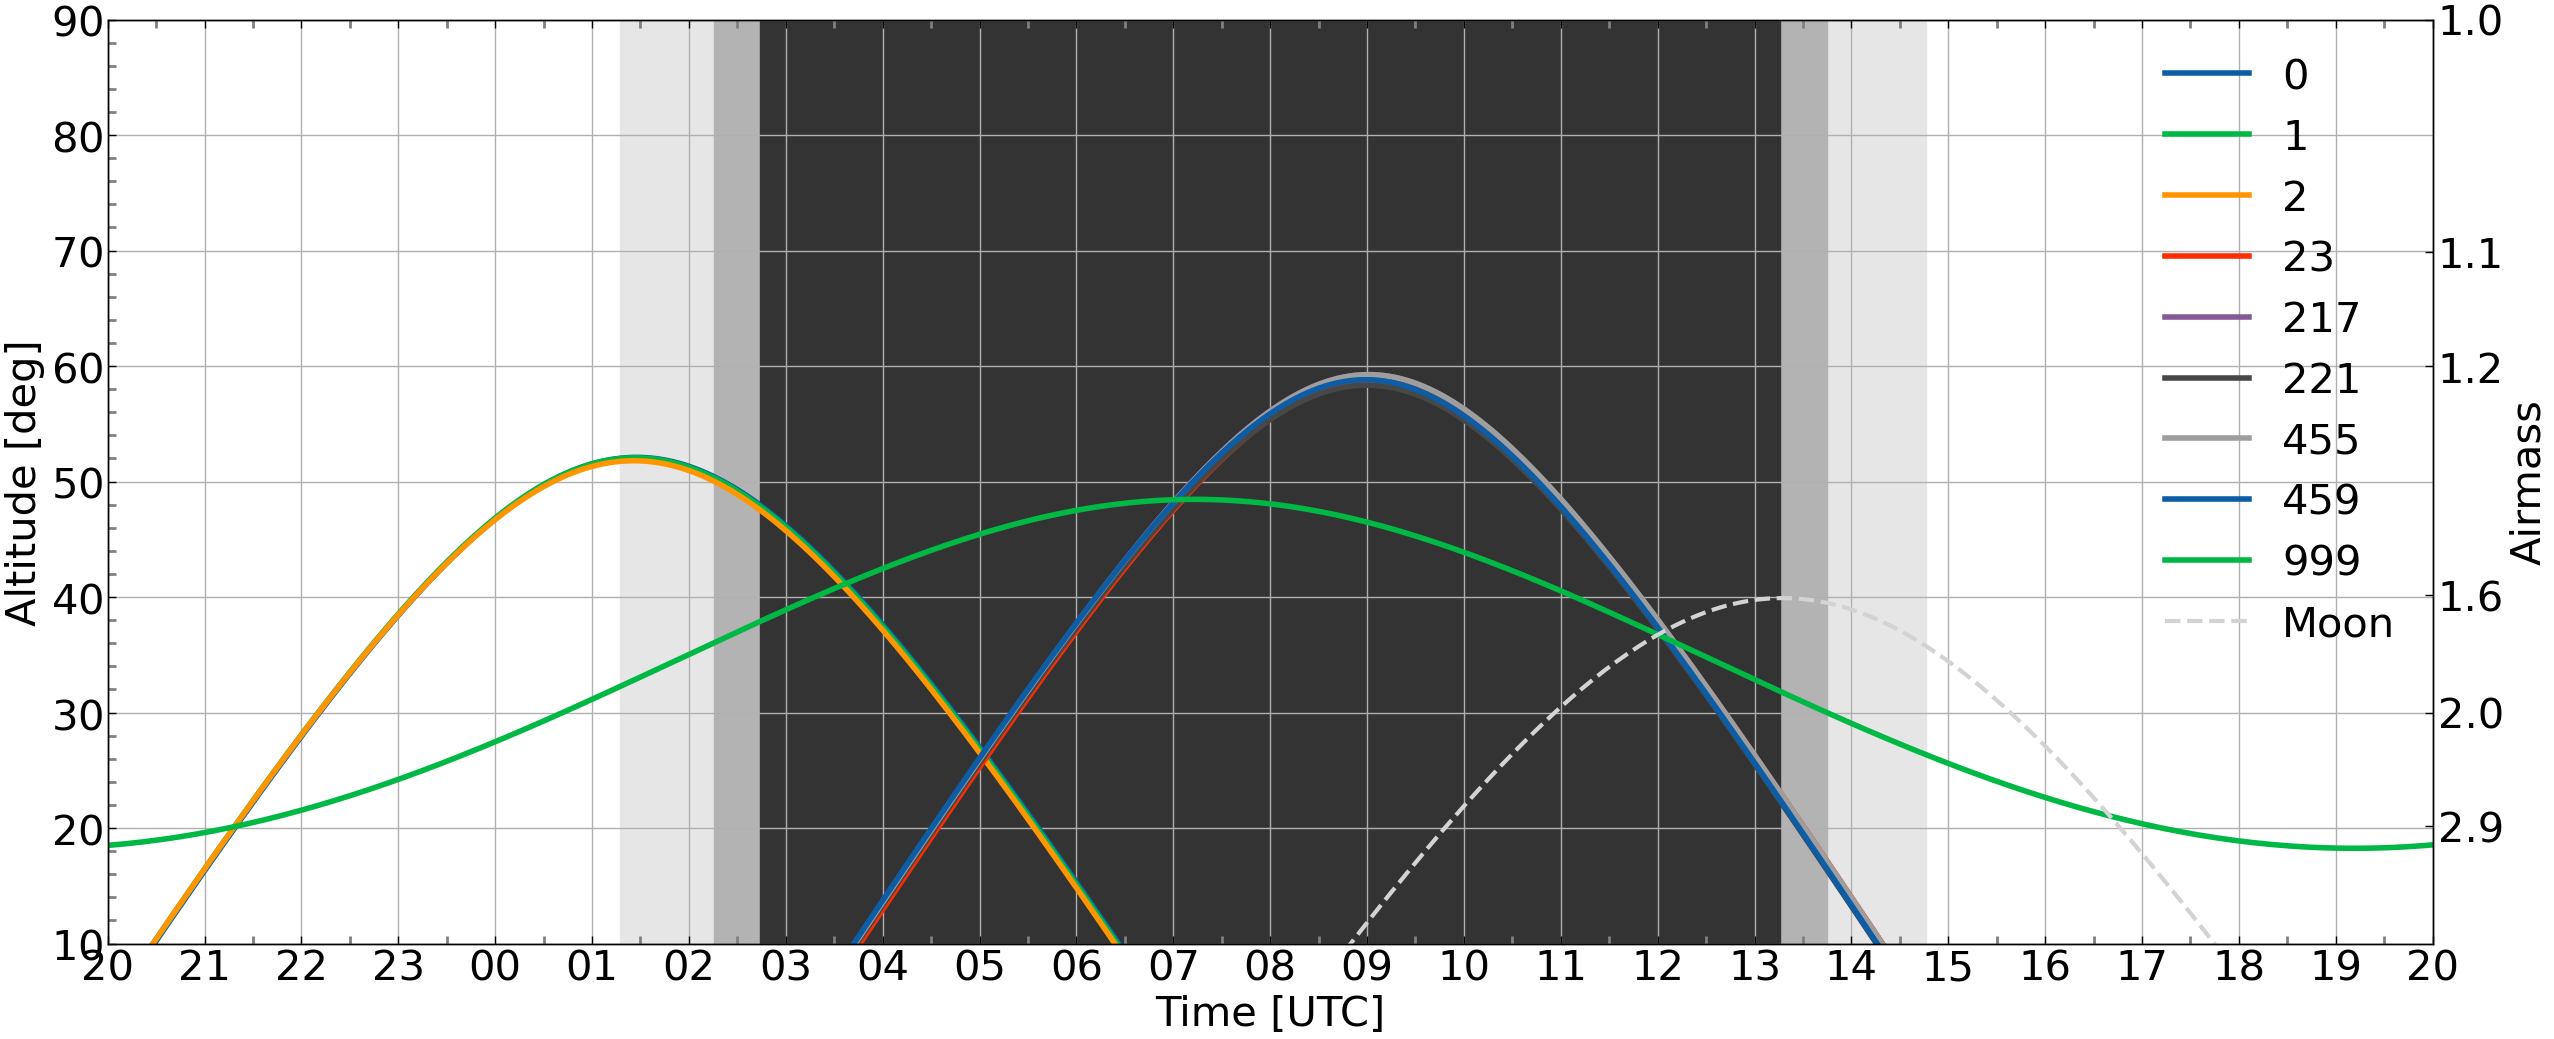

In [148]:
make_targetlist(data_agn_combined_targets, offset_stars)

### Visibility

In [168]:
## BACK UP TARGETS

ids = [51, 52, 53, 54, 55]

# Coordinates
c = ['11:33:55.83 67:01:08.0', '11:36:51.66 +44:50:16.48', '11:38:51.1 -23:21:36.0', '02:13:59.79 +00:42:26.81', '04:28:38.79 -00:00:39.7']
coords = concatenate([SkyCoord.from_name(ci) for ci in c])

data = np.array([ids, coords.ra.deg, coords.dec.deg]).T
data_ztf_targets = table.Table(data, names=['ID', 'RA', 'dec'])
data_ztf_targets

ID,RA,dec
float64,float64,float64
51.0,173.48264,67.0189
52.0,174.21526,44.837912
53.0,174.713,-23.36001
54.0,33.49914,0.707448
55.0,67.16164,-0.01103


In [169]:
from observing_suite import Target, ObservingPlan
from astropy.coordinates import SkyCoord
import astropy.units as u

def make_targetlist(target_list):
    target_list_obs_suite = []

    for i in range(len(target_list)):
        print(i)
        target_coord = SkyCoord(ra=target_list['RA'][i], dec=target_list['dec'][i], unit='deg')
        custom_target = Target(name=str(target_list['ID'].astype(int)[i]), coordinates=target_coord, parse_name=False)
        custom_target.add_configuration(config_name='primary',
                              obstype='spectroscopy',
                              slit_width=1*u.arcsec)
                              #slit_length=60*u.arcsec,
                              #slit_width=1*u.arcsec,
                              #PA=background_fields[i][1]*u.deg)

        target_list_obs_suite.append(custom_target)
    
    plan = ObservingPlan(target_list_obs_suite,
                     observatory='Palomar',
                     obsdates='2024-02-02',
                     utcoffset=-8)
    plan.export_targetlist(name="dbsp_targets_ztf", include_extras=['offsets'])

    ## 
    plan.plot_visibility('2024-02-02');

    return 

0
1
2
3
4


        Use get_body("moon") instead. [observing_suite.observing_plan]
/Users/colinburke/miniconda3/lib/python3.11/site-packages/matplotlib/ticker.py:2937: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


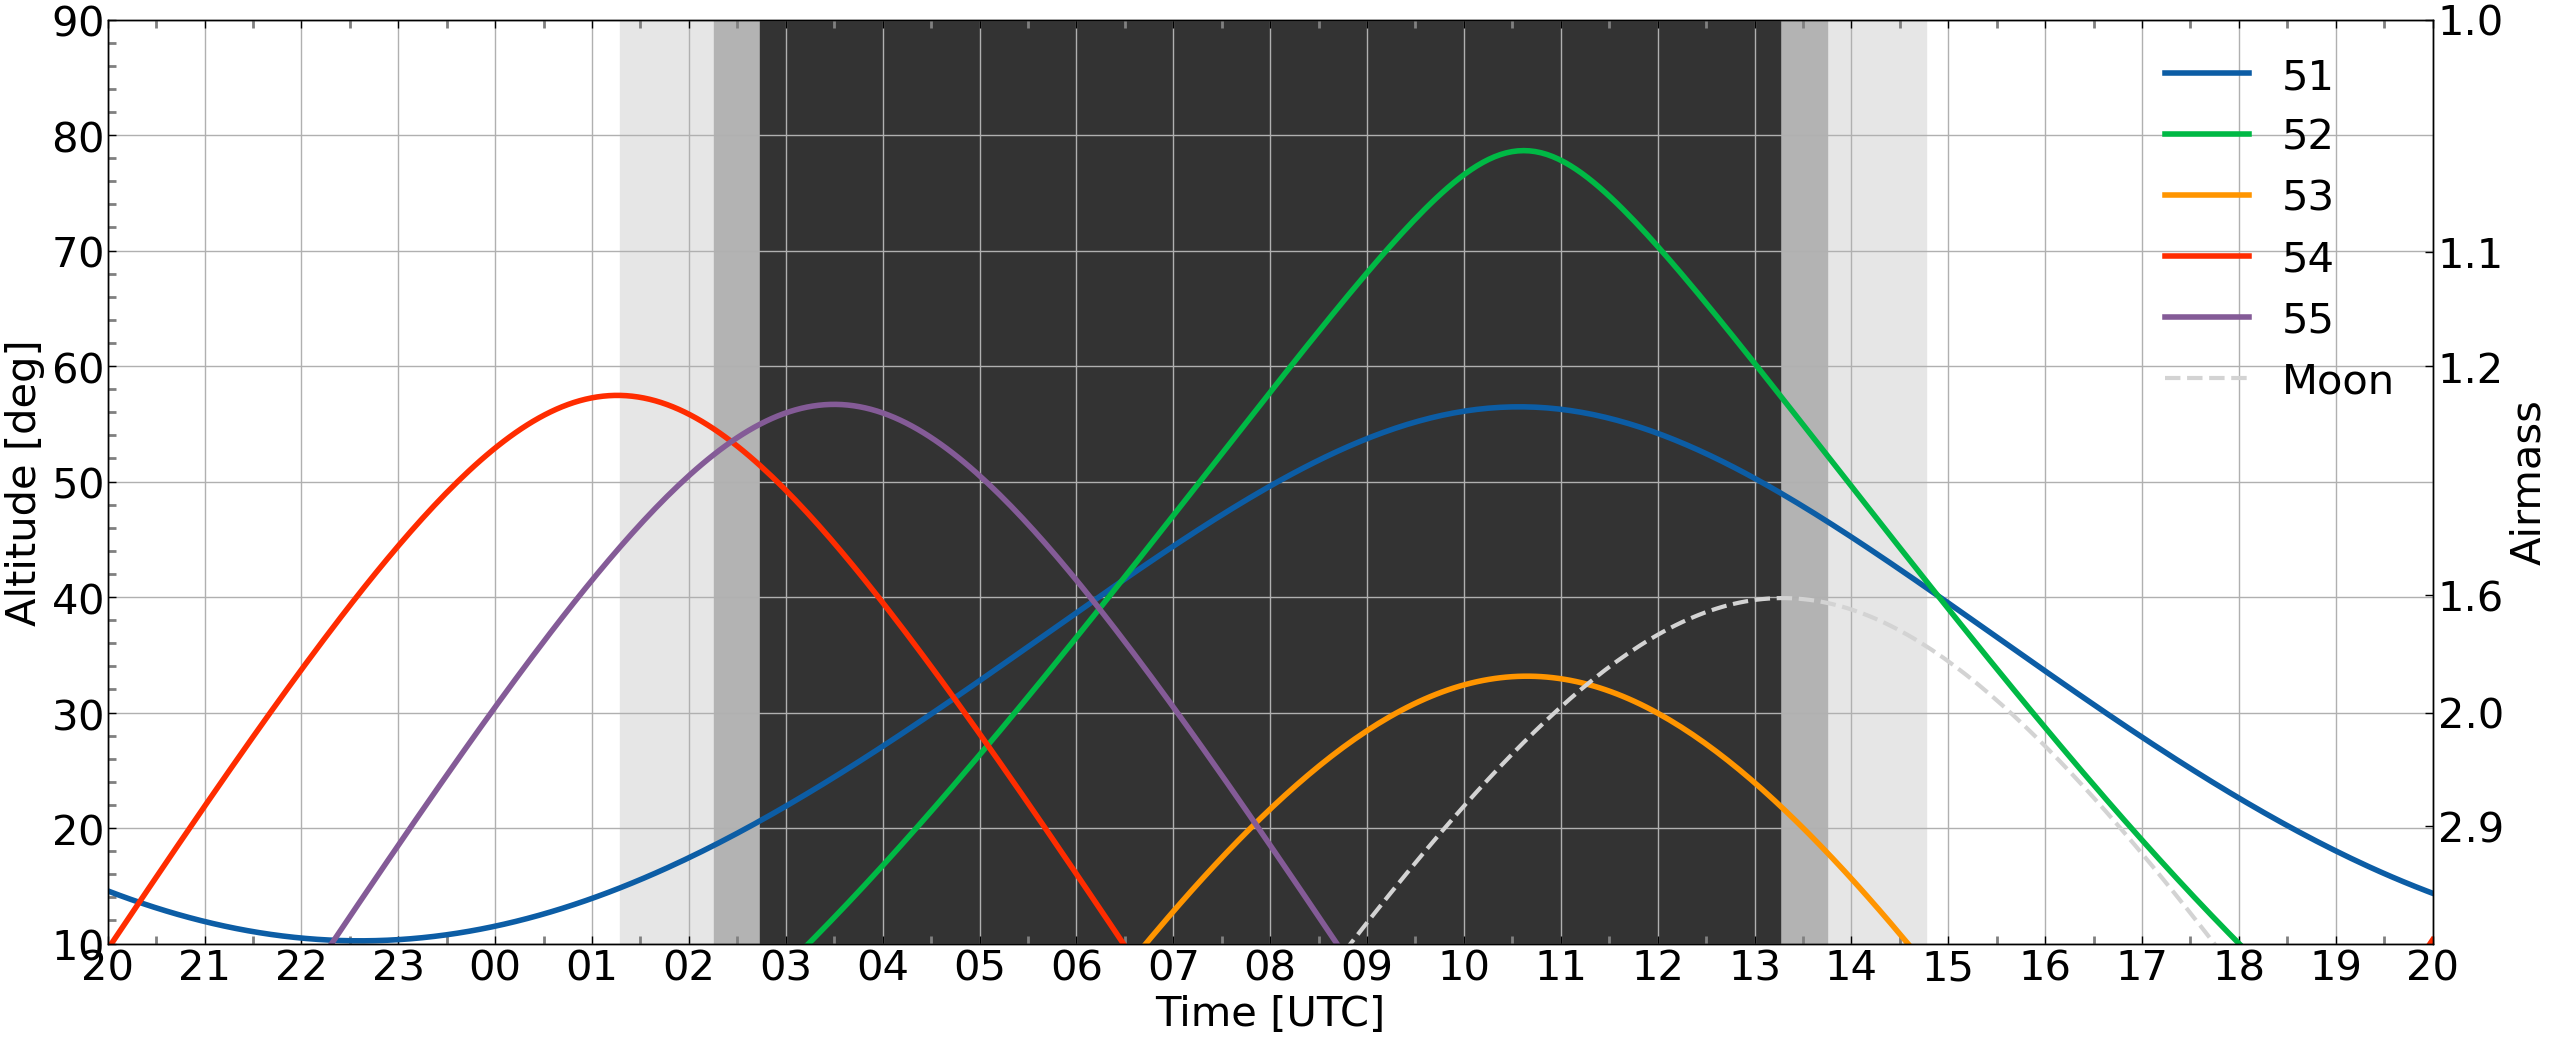

In [170]:
make_targetlist(data_ztf_targets)